In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
debussy_file = "audios/debussy.wav"
duke_file = "audios/duke.wav"
redhot_file = "audios/redhot.wav"

debussy, _ = librosa.load(debussy_file)
duke, _ = librosa.load(duke_file)
redhot, _ = librosa.load(redhot_file)


In [23]:
# extract RMSE with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_debussy = librosa.feature.rms(debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [14]:
rms_debussy

array([0.04940435, 0.05298564, 0.05961845, ..., 0.01386144, 0.01489561,
       0.0144479 ], dtype=float32)

In [15]:
rms_debussy.shape

(1292,)

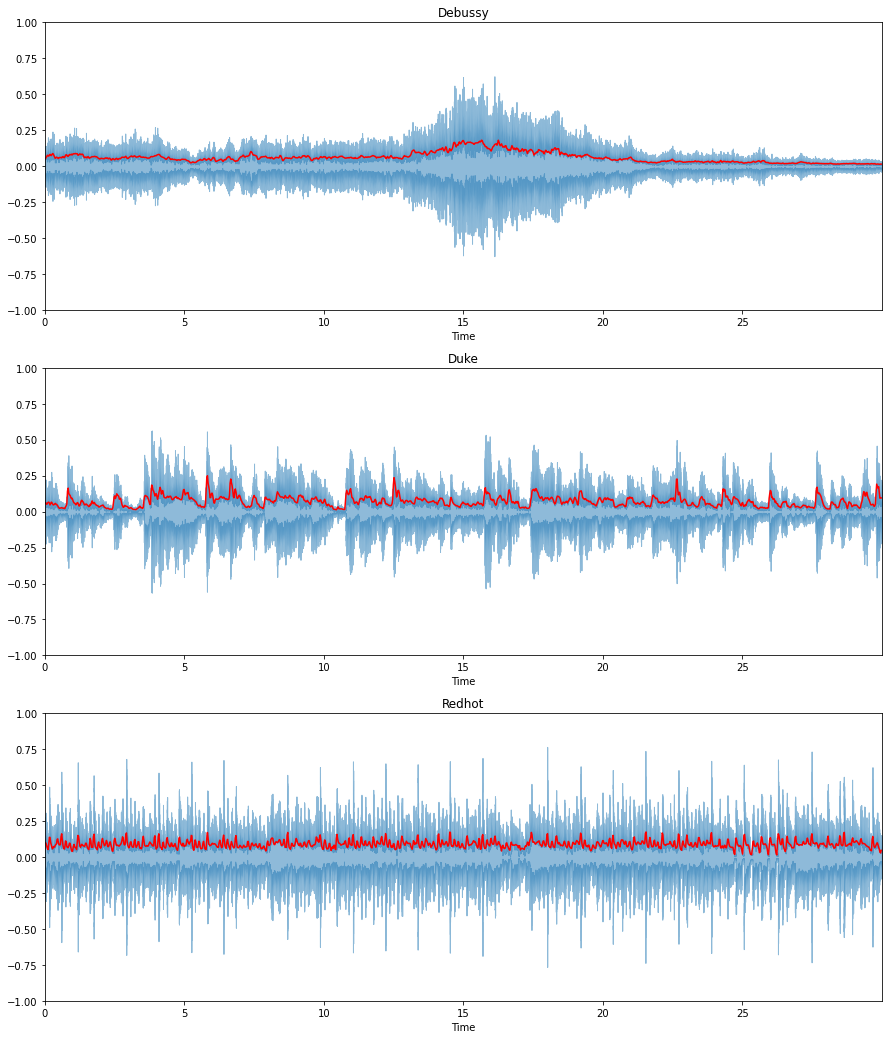

In [16]:
frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,18)) # figsize(width, height)

plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color='r')
plt.title("Debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, rms_duke, color='r')
plt.title("Duke")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color='r')
plt.title("Redhot")
plt.ylim((-1, 1))

plt.show()

In [32]:
def rms(signal, frame_length, hop_length):
    rms = []
    for i in range(0, len(signal), hop_length):
        rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2)/frame_length)
        rms.append(rms_current_frame)
    return np.array(rms)

In [33]:
rms1_debussy = rms(debussy, FRAME_LENGTH, HOP_LENGTH)
rms1_duke = rms(duke, FRAME_LENGTH, HOP_LENGTH)
rms1_redhot = rms(redhot, FRAME_LENGTH, HOP_LENGTH)

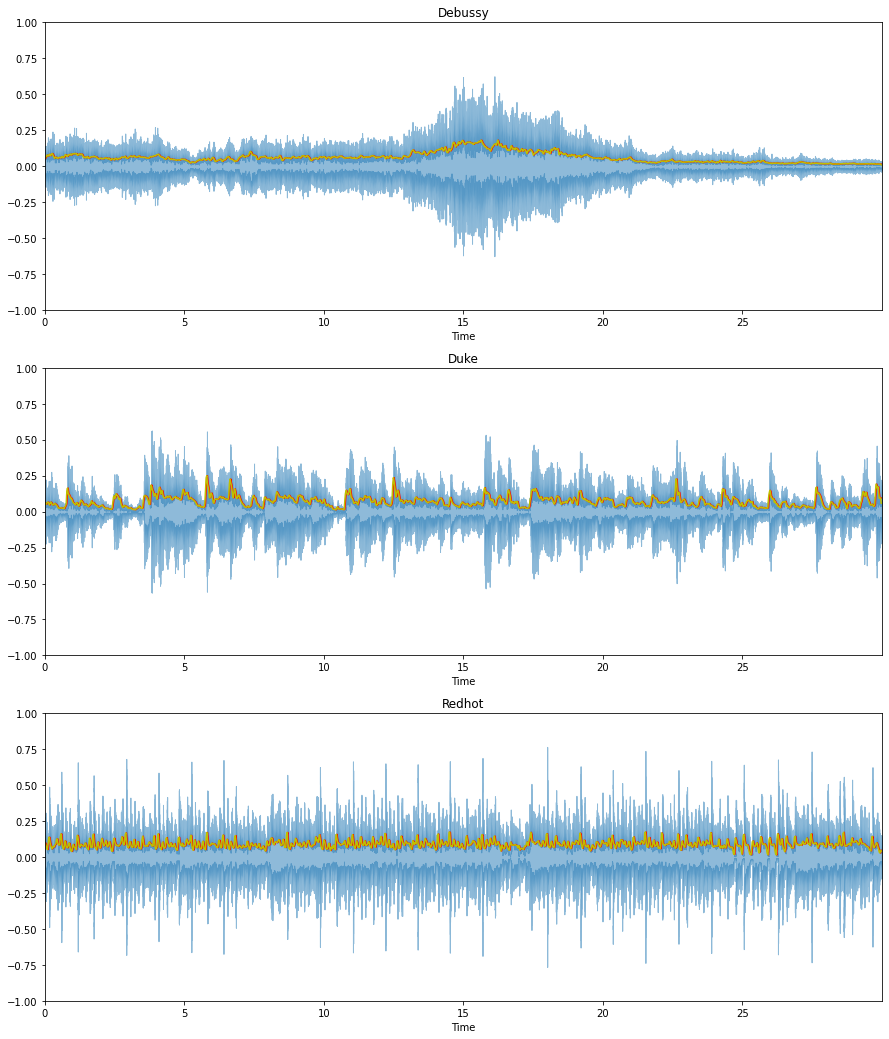

In [34]:
frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,18)) # figsize(width, height)

plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color='r')
plt.plot(t, rms1_debussy, color='y')
plt.title("Debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, rms_duke, color='r')
plt.plot(t, rms1_duke, color='y')
plt.title("Duke")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color='r')
plt.plot(t, rms1_redhot, color='y')
plt.title("Redhot")
plt.ylim((-1, 1))

plt.show()

In [35]:
# Zero-crossing rate
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

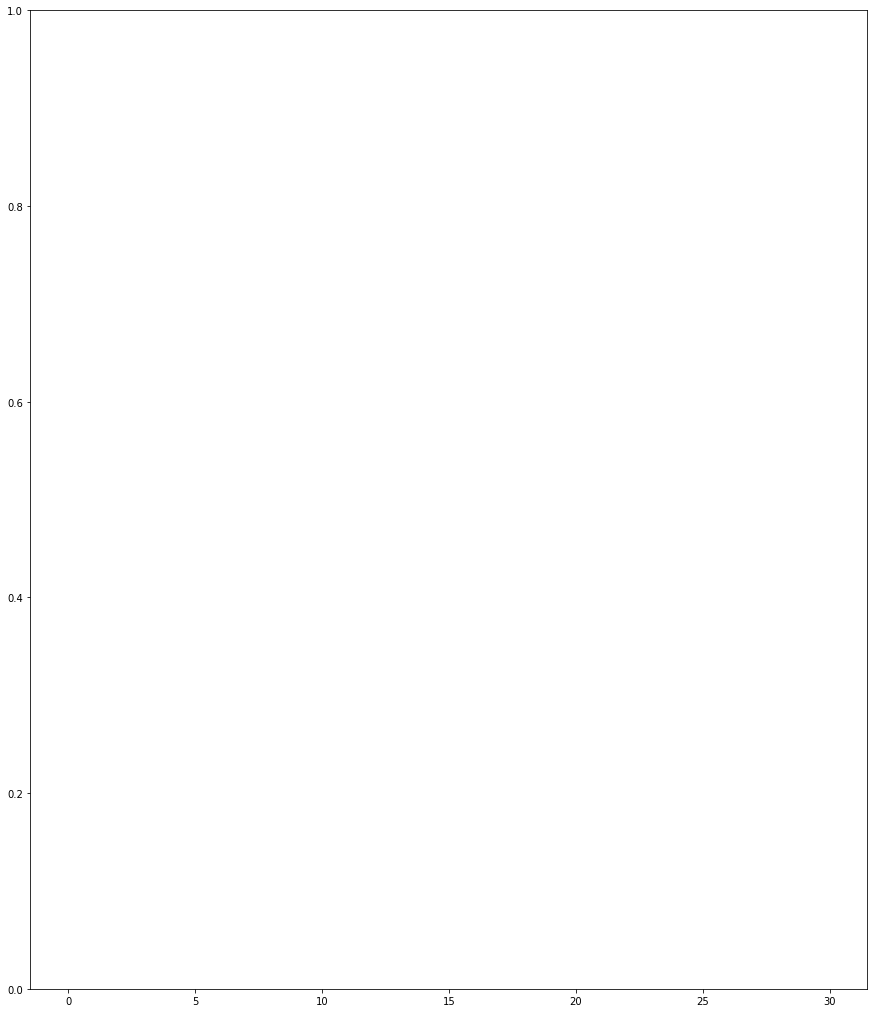

In [42]:
# Visualize ZRC for all the pieces

plt.figure(figsize=(15,18)) # figsize(width, height)
plt.plot(t, zcr_debussy*FRAME_LENGTH, color='r')
plt.plot(t, zcr_duke*FRAME_LENGTH, color='y')
plt.plot(t, zcr_redhot*FRAME_LENGTH, color='b')
plt.ylim((0, 1))

plt.show()